### The plan:
1. turn group and private into lables to predict
2. pre-processing: stemming, lemmetizing...etc 
3. vectorize text
4. run various supervised learning models to find the best one that can predict

In [1]:

import json
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [8]:
df = pd.read_csv("/Users/KerryChowChow/DSI-SF-3-kelly/CAPSTONE/csv/fb_pri_gro.csv")

In [9]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [10]:
df.columns

Index([u'thread#', u'user', u'message', u'Year', u'Month', u'Hour', u'Length',
       u'conco_style'],
      dtype='object')

In [11]:
df.rename(columns={'conco_style':'private'}, inplace = True)

In [12]:
df.private = df.private.apply(lambda x: 1 if x == 'private' else 0)

In [14]:
others_df = df[df.user != "Main_User"]

## Vectorization:

In [8]:
others_df.head()

,thread#,user,message,Year,Month,Hour,Length,private
6,0,Person_1,ALTON BROWN,2012,2,16,11,1
7,0,Person_1,SPMAMAPAAMAM,2012,2,16,12,1
8,0,Person_1,http://seshn.com/lMe6O,2012,2,16,22,1
11,0,Person_1,How's kicks?,2012,2,10,12,1
13,0,Person_1,'points of relvativity?',2012,2,9,24,1


In [15]:
binary_df = pd.DataFrame({'label': others_df.private, 'message': others_df.message, 'length': others_df.Length})

In [10]:
binary_df.tail()
#one possible problem with this is that the private or group conversations are not a perfect split
# because of facebook's weird "sometime showing name and sometimes showing id" thing

,label,length,message
697559,0,41,I don't think that my approach is flawed.
697560,0,31,yeah that seems like a bad idea
697561,0,3,lol
697573,0,42,like i call everyone out on their bullshit
697574,0,38,because I call her out on her bullshit


In [11]:
pd.DataFrame(binary_df.groupby(['label']).message.describe())

message
label               
0     count   150498
      unique  134464
      top        lol
      freq       426
1     count   152652
      unique  134629
      top         :)
      freq       611

In [37]:
binary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312136 entries, 6 to 697574
Data columns (total 3 columns):
label      312136 non-null int64
length     312136 non-null int64
message    303150 non-null object
dtypes: int64(2), object(1)
memory usage: 9.5+ MB


The average lenght of messages is: 64.9912698311


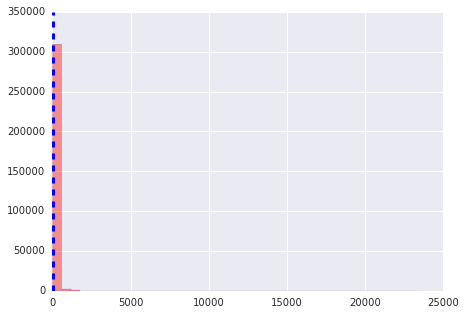

In [42]:
import seaborn as sns
messag_length = binary_df.length.values
mean_length = np.mean(messag_length)
print "The average lenght of messages is: %s" % (mean_length)

fig = plt.figure(figsize=(7,5))
ax = fig.gca()

ax = sns.distplot(messag_length, bins=40, ax=ax, kde=False, color='r')
ax.axvline(mean_length, lw=3, ls='dashed', color='blue')
plt.show()

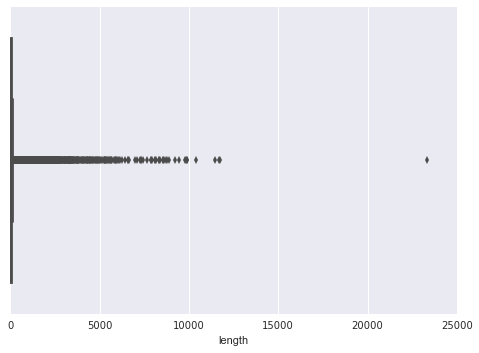

In [43]:
sns.boxplot(binary_df.length)

In [41]:
binary_df.length.describe()

count    312136.000000
mean         64.991270
std         182.002687
min           0.000000
25%          15.000000
50%          33.000000
75%          66.000000
max       23357.000000
Name: length, dtype: float64

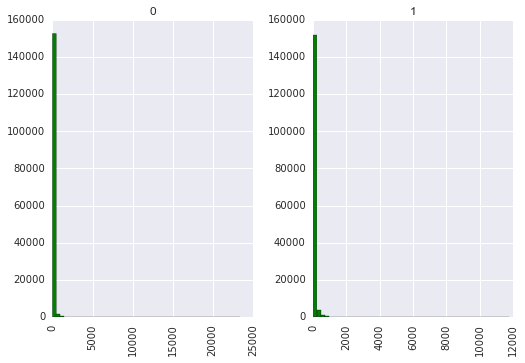

In [44]:
binary_df.hist(column='length', by='label', bins=50, color='g')
plt.show()

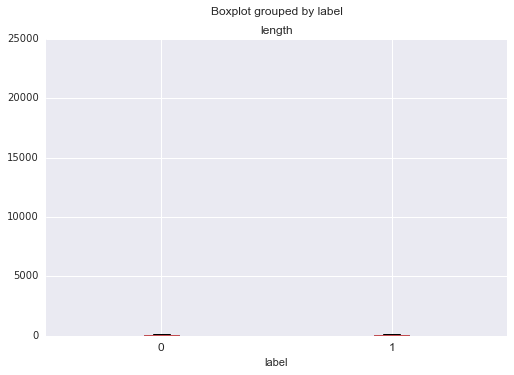

In [48]:
binary_df.boxplot(column='length', by='label')
plt.show()

In [52]:
binary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312136 entries, 6 to 697574
Data columns (total 3 columns):
label      312136 non-null int64
length     312136 non-null int64
message    303150 non-null object
dtypes: int64(2), object(1)
memory usage: 9.5+ MB


In [16]:
binary_df.dropna(inplace = True)

In [13]:
binary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303150 entries, 6 to 697574
Data columns (total 3 columns):
label      303150 non-null int64
length     303150 non-null int64
message    303150 non-null object
dtypes: int64(2), object(1)
memory usage: 9.3+ MB


In [17]:
binary_df.to_csv("fb_11_21.csv",encoding='utf-8')

In [4]:
clean = pd.read_csv("../csv/fb_11_21.csv")

### note: the text has high variance in length

In [18]:
df = binary_df.copy()

In [20]:
#sampling a few since the pre-processing the whole dataset breaks my laptop
sample = df.sample(frac=0.5)

In [13]:
sample.tail(2)

,label,length,message
570241,1,21,When I'm not on Bart.
222642,1,24,Calling you from hangout


## Pre-Processing:

In [6]:
pd.DataFrame(clean.groupby(['label']).message.describe())

message
label               
0     count   150498
      unique  134464
      top        lol
      freq       426
1     count   152652
      unique  134629
      top         :)
      freq       611

## note: 'lol' and ':)' are important indicators 

In [7]:
from nltk.stem import PorterStemmer

In [8]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [9]:
stemmer = PorterStemmer()
def pre_processing(message):
    output = []
    token_list = word_tokenize(message)
    for word in token_list:
        stemmed = stemmer.stem(word)
        stemmed = stemmed.lower()
        output.append(stemmed)
    return output
    

In [14]:
pre_processing("I am thinking about when to eat this Selegeline.")

[u'i',
 u'am',
 u'think',
 u'about',
 u'when',
 u'to',
 u'eat',
 u'thi',
 u'selegelin',
 u'.']

In [21]:
#sample.message = sample.message.apply(lambda x: x.decode(encoding='UTF-8',errors='strict'))

In [28]:
df.message.apply(pre_processing)

6                                            [alton, brown]
7                                            [spmamapaamam]
8                              [http, :, //seshn.com/lme6o]
11                                       [how, 's, kick, ?]
13                                 ['point, of, relv, ?, ']
15                                              [hey, fuck]
16                                 [codehero, kickstart, ?]
17                                   [creator, of, padmapp]
18        [http, :, //www.reddit.com/user/prestodigitarium]
19                                   [padmapp, for, job, ?]
24          [the, abov, post, is, not, a, real, sentenc, .]
26                                                     [no]
30                                               [quora, .]
35        [someth, to, watch, instead, of, call, my, fat...
36                                         [ah, ,, good, .]
40                                             [30, min, .]
43                     [i, have, band, p

## Vectorizing:


In [10]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
""""pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=split_into_lemmas, stop_words='english')),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])"""

'"pipeline = Pipeline([\n    (\'bow\', CountVectorizer(analyzer=split_into_lemmas, stop_words=\'english\')),  # strings to token integer counts\n    (\'tfidf\', TfidfTransformer()),  # integer counts to weighted TF-IDF scores\n    (\'classifier\', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier\n])'

In [11]:
sample = clean

In [77]:
sample

,Unnamed: 0,label,length,message,link
0,6,1,11,ALTON BROWN,None
1,7,1,12,SPMAMAPAAMAM,None
2,8,1,22,http://seshn.com/lMe6O,None
3,11,1,12,How's kicks?,None
4,13,1,24,'points of relvativity?',None
5,15,1,8,HEY FUCK,None
6,16,1,21,CodeHero Kickstarter?,None
7,17,1,20,Creator of PadMapper,None
8,18,1,43,http://www.reddit.com/user/prestodigitarium,reddit
9,19,1,19,Padmapper for Jobs?,None


In [86]:
import re 
#pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
#pattern2 = re.compile("/^(?:www\.)?(.*?)\.(?:com|au\.uk|co\.in)$/")
pattern = re.compile('^http[s]?://[www\.]?([a-zA-Z]*)')
pattern.findall("http://www.reddit.com/user/prestodigitarium")
#pattern.findall("http://seshn.com/lMe6O")

['ww']

In [65]:
#removing links

sample['link'] = sample.message.apply(lambda x: pattern.findall(x))

In [68]:
sample.link = sample.link.map(lambda a: a[0] if len(a)!=0 else None)
#about 1% of the the comments are links

In [71]:
sample.link.isnull().sum()

301377

In [73]:
sample.link.notnull().sum()

1773

In [88]:
# decided to drop links
sample.message = sample.message.apply(lambda x: None if 'http' in x else x)

In [94]:
sample.drop(['link','Unnamed: 0'], axis = 1, inplace = True)

In [97]:
sample.dropna(inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296512 entries, 0 to 303149
Data columns (total 3 columns):
label      296512 non-null int64
length     296512 non-null int64
message    296512 non-null object
dtypes: int64(2), object(1)
memory usage: 9.0+ MB


In [43]:
#count vectorize both msg_train and msg_test to get equal amount of features


In [17]:
cvec = CountVectorizer(analyzer=pre_processing, stop_words='english',
                                 ngram_range=(1,2), strip_accents='unicode', max_df=0.9, 
                                 min_df = 5, decode_error = 'ignore'
                      )
cvec_fit = cvec.fit(sample.message)
print len(cvec_fit.vocabulary_)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc2 in position 6: ordinal not in range(128)

In [34]:
#import cPickle
#with open(r"pickle/cvec_sample2.pickle", "wb") as output_file:
#    cPickle.dump(bow_transformer, output_file)

In [22]:
#import cPickle
#with open(r"pickle/cvec_sample2.pickle", "rb") as input_file:
#    cvec = cPickle.load(input_file)

In [45]:
X = pd.DataFrame(cvec_fit.transform(sample.message).todense(),
                       columns=cvec_fit.get_feature_names())
X.head()

,!,#,$,%,&,','','09,'caus,'d,...,󾌴,󾌵,󾌸,󾍇,󾍛,󾟭,󾬐,󾮗,󾰀,󾰛
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#with open(r"x_train_sample.pickle", "wb") as output_file:
#    cPickle.dump(X_train, output_file)

In [46]:
word_counts = X.sum(axis=0)


In [116]:
word_counts.sort_values(ascending = False).head(100)

i         80782
.         61063
to        60105
,         55928
the       49648
you       42554
and       39157
a         37821
it        29184
?         27978
of        25537
that      25076
in        24702
!         24035
is        21295
for       20607
be        17032
do        16126
's        15687
have      15278
:         15202
my        15103
with      13790
me        13644
on        13188
so        12158
but       12081
n't       12079
)         11820
are       11658
          ...  
he         4971
'll        4905
now        4883
when       4882
an         4794
thing      4733
some       4711
;          4657
see        4536
also       4350
no         4319
realli     4158
feel       3952
're        3950
need       3835
http       3799
u          3788
too        3770
them       3758
''         3739
by         3723
-          3699
other      3672
well       3630
then       3618
love       3614
come       3597
look       3592
``         3571
yeah       3537
dtype: int64

In [117]:
print X_test.shape
print X_train.shape


(45473, 4883)
(106102, 7633)


## Predicting on training only:

In [52]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
model = lr.fit(X_train, y_train)

In [76]:
X_train.columns[-20:]

Index([u'😕', u'😛', u'😞', u'🙂', u'🙏', u'🚀', u'🚲', u'󾌣', u'󾌩', u'󾌬',
       u'󾌰', u'󾌱', u'󾌳', u'󾌴', u'󾌵', u'󾌸', u'󾍇', u'󾟭', u'󾬐', u'󾰛'],
      dtype='object')

In [79]:
X_train.iloc[:,:-20]

,!,#,$,%,&,','','d,'em,'have,...,的來電。,錯過了,🎈,👍,💖,💰,🔵,😀,😉,😊
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
cross_val_score(model, X_train.iloc[:,:100], y_train, cv = 10, n_jobs = -1)

array([ 0.52153426,  0.52228819,  0.51163887,  0.51719913,  0.51804731,
        0.50914232,  0.51809614,  0.52672259,  0.52662833,  0.52342351])

In [100]:
y_train = y_train.reset_index().drop(['index'], axis = 1)

In [88]:
sample.label[162028]

0

In [105]:
print 'predicted:', model.predict(X_train.iloc[50,:])
print 'expected:', y_train.iloc[50,:]

predicted: [1]
expected: label    0
Name: 50, dtype: int64


//anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [106]:
print 'predicted:', model.predict(X_train.iloc[60,:])
print 'expected:', y_train.iloc[60,:]

predicted: [0]
expected: label    0
Name: 60, dtype: int64


//anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [108]:
all_predictions = model.predict(X_train)
print all_predictions

[0 0 0 ..., 1 1 1]


In [113]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print 'accuracy', accuracy_score(y_train, all_predictions)
print 'confusion matrix\n', confusion_matrix(y_train, all_predictions)
print '(row=expected, col=predicted)'


accuracy 0.619846939737
confusion matrix
[[31752 21003]
 [19332 34015]]
(row=expected, col=predicted)


In [115]:
print classification_report(y_train, all_predictions)

             precision    recall  f1-score   support

          0       0.62      0.60      0.61     52755
          1       0.62      0.64      0.63     53347

avg / total       0.62      0.62      0.62    106102



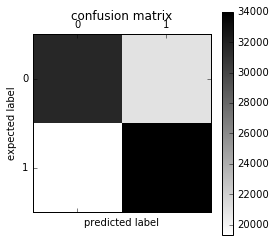

In [121]:
plt.matshow(confusion_matrix(y_train, all_predictions), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

## Experiment on both training and testing:

In [149]:
#removing numbers
new_column = []
for name in X.columns:
    if name.isdigit():
        print name
    else:
        new_column.append(name)

0
1
10
100
1000
101
106
11
110
112
1130
1181
12
120
1200
1230
125
13
130
1300
135
14
140
1400
141
15
150
1500
16
160
1600
17
175
18
180
1800
19
2
20
200
2000
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2050
208
21
216
22
23
230
233
2331
2371
24
25
250
2500
26
27
272
275
28
29
3
30
300
3000
302
31
32
33
330
333
34
35
350
36
360
365
37
38
39
399
4
40
400
4000
408
415
42
420
43
44
45
450
48
49
5
50
500
5000
510
52
53
530
54
55
56
6
60
600
63
630
64
65
650
7
70
700
730
75
750
8
80
800
830
85
858
9
90
900
930
94301
94306
94607
94703
95
950
98
99


In [151]:
X_1 = X[new_column]

In [153]:
# dropping duplicated column names that came from emojis that cannot be read by utf8
X_1.iloc[:,-60:].head(2)

,~,~10,~2,~4,~lynn,à,–,—,“i,”,...,󾌴,󾌵,󾌸,󾍇,󾍛,󾟭,󾬐,󾮗,󾰀,󾰛
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
X_2 = X_1.iloc[:,-60:]

In [135]:
X_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151575 entries, 0 to 151574
Columns: 9252 entries, ! to 🚲
dtypes: int64(9252)
memory usage: 10.4 GB


In [155]:
msg_train, msg_test, label_train, label_test = train_test_split(X_2, sample['label'], test_size=0.2)

print len(msg_train), len(msg_test), len(msg_train) + len(msg_test)

121260 30315 151575


In [158]:
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression()
predict_label = lr2.fit(msg_train, label_train)

In [161]:
with open(r"logit_sample.pickle", "wb") as output_file:
    cPickle.dump(predict_label, output_file)
# pickling the fitting logistic model of sampled dataset (50%)

In [159]:
cross_val_score(predict_label, msg_train, label_train, cv = 10, n_jobs = -1)

array([ 0.50416426,  0.50432918,  0.50420584,  0.50486558,  0.50371103,
        0.50453571,  0.50387597,  0.50346363,  0.50457732,  0.50391753])

In [160]:
test_pred = predict_label.predict(msg_test)

In [163]:
print 'accuracy', accuracy_score(label_test, test_pred)
print 'confusion matrix\n', confusion_matrix(label_test, test_pred)
print '(row=expected, col=predicted)'

 accuracy 0.505789213261
confusion matrix
[[   88 14942]
 [   40 15245]]
(row=expected, col=predicted)


In [164]:
print classification_report(label_test, test_pred)

             precision    recall  f1-score   support

          0       0.69      0.01      0.01     15030
          1       0.51      1.00      0.67     15285

avg / total       0.60      0.51      0.34     30315



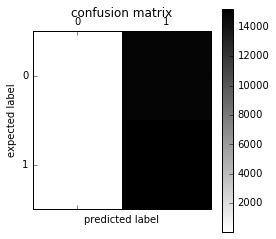

In [165]:
plt.matshow(confusion_matrix(label_test, test_pred), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

- we got really high recall for predicting private chat which means that given all the expected private conversations, we can predict them as private (0 false negative). 
- However, we have a low precision score on predicitng private chat which means the model is not really precise on differentiating private chat from group chat. It's almost a 50/50 chance.
- Looking at the confusion matrix graph above, it seems like the model basically classifies all conversations as private chat

In [81]:
msg_train.head(2)

516307    i've recently become more audacious in my soci...
328448             Ja let's move the wagon somewhere else󾬏
Name: message, dtype: object

In [86]:
from collections import Counter
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words = 'english' ,analyzer = 'word', min_df=5)


In [87]:
bow = cvec.fit(msg_train)

In [88]:
print len(bow.vocabulary_)

15177


In [95]:
cvec.get_feature_names()[-20:-10]

[u'zimride',
 u'zinc',
 u'zip',
 u'zipper',
 u'zirtual',
 u'zoe',
 u'zombie',
 u'zombies',
 u'zone',
 u'zones']

In [90]:
cvec.fit_transform(msg_train)

<212205x15177 sparse matrix of type '<type 'numpy.int64'>'
	with 1087023 stored elements in Compressed Sparse Row format>

In [91]:
X_train = pd.DataFrame(cvec.transform(msg_train).todense(),
                       columns=cvec.get_feature_names())
X_train.head()

,00,000,00am,00pm,01,02,03,04,05,06,...,zoning,zoo,zoom,zuck,zuckerberg,zzzz,zzzzz,打電話給,的來電,錯過了
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
word_counts = X_train.sum(axis=0)
word_counts.sort_values(ascending = False).head(20)

KeyboardInterrupt: 